In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error
from matplotlib import pyplot as plt

df = pd.read_csv('Data/cleanData.csv')

df_final = pd.get_dummies(df, columns=['EdLevel', 'RemoteWork'], drop_first=True)

X = df_final.drop('Salary', axis=1)
y = df_final['Salary']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Features being used: {list(X.columns)}")
print(f"Training set size: {X_train.shape[0]} samples")

Features being used: ['YearsCode', 'Is_USA', 'EdLevel_Masters', 'RemoteWork_In-person', 'RemoteWork_Remote']
Training set size: 11164 samples


In [23]:
lr_model = LinearRegression() 
lr_model.fit(X_train, y_train)

y_test_preds = lr_model.predict(X_test)
y_train_preds = lr_model.predict(X_train)

# Calculate performance
test_score = r2_score(y_test, y_test_preds)
test_rmse = root_mean_squared_error(y_test, y_test_preds)

print(f"The R-squared score: {test_score:.3f}")
print(f"The RMSE: ${test_rmse:,.2f}")

The R-squared score: 0.400
The RMSE: $38,068.25


In [24]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})

coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

print("Model Coefficients (Dollar impact on Salary):")
print(coef_df)

Model Coefficients (Dollar impact on Salary):
                Feature   Coefficient
1                Is_USA  65634.717696
4     RemoteWork_Remote   3609.011388
2       EdLevel_Masters   2184.439183
0             YearsCode   1421.951211
3  RemoteWork_In-person -12049.583949


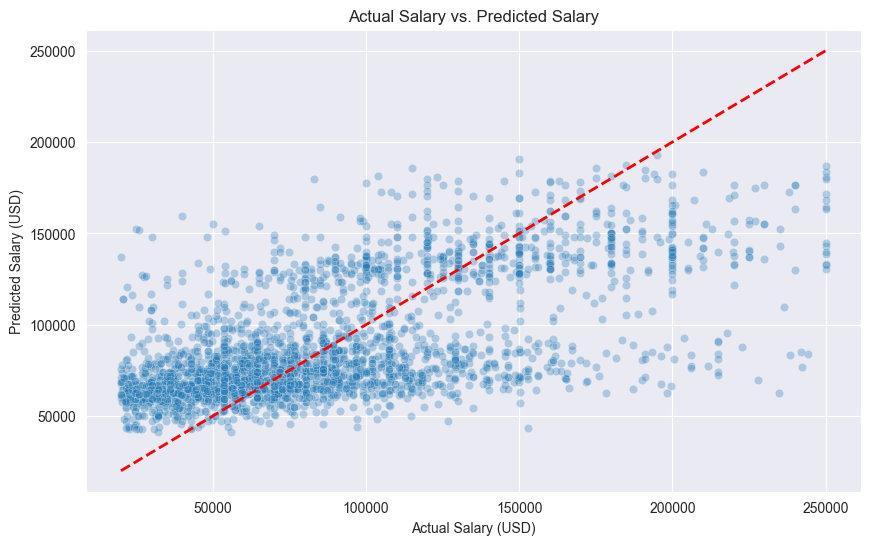

In [26]:
plt.figure(figsize=(10, 6))

# Plotting the actual vs predicted values
sns.scatterplot(x=y_test, y=y_test_preds, alpha=0.3)

# Plotting the "Perfect Prediction" line
max_val = max(max(y_test), max(y_test_preds))
min_val = min(min(y_test), min(y_test_preds))
plt.plot([min_val, max_val], [min_val, max_val], color='red', lw=2, linestyle='--')

plt.title('Actual Salary vs. Predicted Salary')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.show()

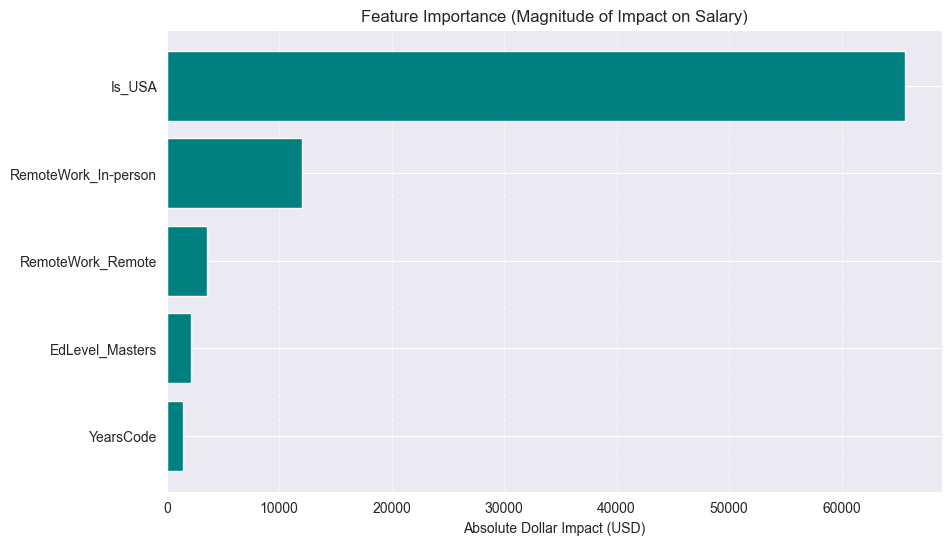

In [27]:
coef_df['Abs_Importance'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Abs_Importance'], color='teal')
plt.title('Feature Importance (Magnitude of Impact on Salary)')
plt.xlabel('Absolute Dollar Impact (USD)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Conclusion & Evaluation: Answering the Business Questions

After cleaning the data and training a Linear Regression model ($R^2 = 0.40$), I have drawn the following evidence-based conclusions regarding the drivers of developer salaries.

### Q1: Does experience pay off linearly?
**Yes.** My model shows a coefficient for `YearsCode` of approximately **$1,422**. This means that for every additional year of experience, a developer can expect an average salary increase of nearly $1,500, assuming all other factors (location, education, and work style) remain constant.

### Q2: Is a Master's degree a "Golden Ticket"?
**Not necessarily.** The model assigns a value of **$2,184** to having a Master's degree over a Bachelor's. While positive, this is one of the smallest impacts in my model. When compared to the cost and time of a two-year degree, the immediate ROI (Return on Investment) in the software industry appears lower than the value of simply gaining two more years of professional experience.

### Q3: What is the "Remote Premium"?
**Significant.** The data shows a clear hierarchy in work environments:
* **Remote work** provides a **$3,609** boost over the Hybrid baseline.
* **In-person work** carries a heavy "penalty," reducing the predicted salary by **$12,049** compared to Hybrid workers.
This suggests that high-paying roles are increasingly moving toward remote or flexible models.

### Summary of Feature Importance
The single largest predictor of salary in this dataset is **Geography**. Being located in the **USA** adds over **$65,000** to the predicted annual salary. While skills and education matter, my analysis shows that *where* you work and *how* you work (Remote vs. In-person) currently have a more substantial impact on total compensation than the specific degree you hold.